<a href="https://colab.research.google.com/github/Auful01/PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan : 40


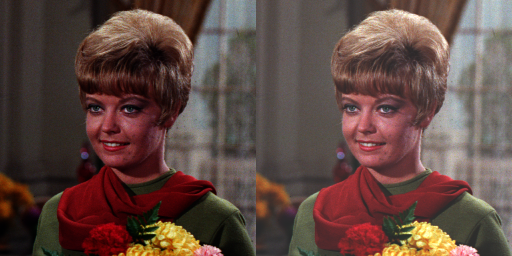

In [30]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try: 
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))

cv2_imshow(final_frame)

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]:1.5


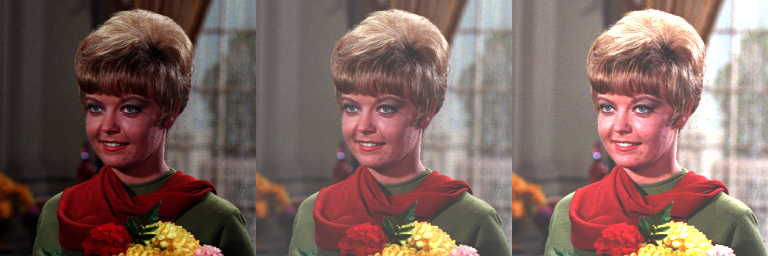

In [31]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')

try: 
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)
      contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image, contrast_image))

cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan transformasi Log
--------------------------------
Masukkan nilai kecerahan : 40


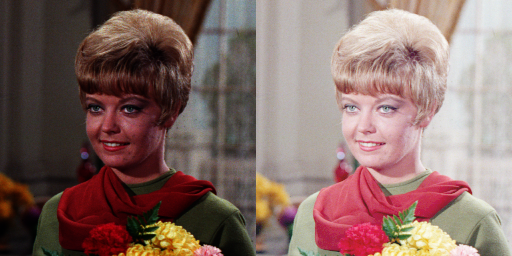

In [32]:
print('Mengubah tingkat kecerahan citra dengan transformasi Log')
print('--------------------------------')

try: 
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('error, not a number')

# log_image = np.zeros(original.shape, original.dtype)

c = 255/ np.log(1 + np.max(original))
log_image = c * (np.log(original + 1))

log_image = np.array(log_image, dtype=np.uint8)

final = cv.hconcat((original, log_image))

cv2_imshow(final)

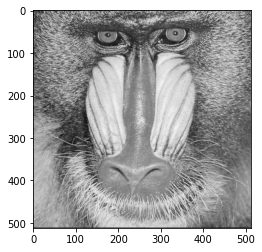

In [52]:
from PIL import Image
original2 = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')

original3 = cv.cvtColor(original2, cv.COLOR_BGR2RGB)

R, G, B = original3[:,:,0], original3[:,:,1], original3[:,:,2]

gscl = np.mean(original3, axis=2)

plt.imshow(gscl, cmap='gray')

In [71]:
L = (([np.max(R), np.max(G), np.max(B)] + [np.min(R),np.min(G),np.min(B)]))
print(L)

[255, 236, 255, 0, 0, 0]


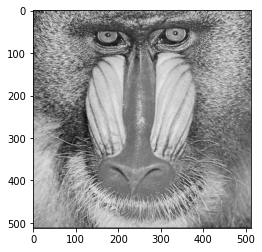

In [54]:
  Z = 0.21 * R + 0.72 * G + 0.07 * B
plt.imshow(Z, cmap='gray')